# (Ford GoBike System Data Exploration)
## by (Amr Barakat)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, we will try to get some insights from this database.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("fordgobike-tripdata.csv")
print(df.shape)
print(df.dtypes)
df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset contains 183,412 record with 16 columns that include the information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

### What is/are the main feature(s) of interest in your dataset?

> The Main features of interest here are the :
1. Knowing the best time for renting the bikes
2. The common properties for the members with high renting rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will help support my investigation into my feature(s) of interest are:
1. start_time and end_time of the rent.
2. start station and end station.
3. user_type, ember_birth_year and member_gender

## Clean Data

> Before start explroing the data we have to clean it at first

In [3]:
# convert start_time and end_time type to datetime type
df_clean = df
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# fill the mssing birth_year with 0 and convert its type to integer

df_clean.member_birth_year = df_clean.member_birth_year.fillna(0)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## More Cleaning
* We will split the start and end time to months and days to know the pike renting days and month
* Get the age of the members

In [4]:
df_clean["start_month"] = df_clean.start_time.dt.month
df_clean["start_day"] = df_clean.start_time.dt.day
df_clean["week day"] = df_clean.start_time.dt.day_name()
df_clean["start_hour"] = df_clean.start_time.dt.hour

df_clean["end_month"] = df_clean.end_time.dt.month
df_clean["end_day"] = df_clean.end_time.dt.day
df_clean['age'] = df_clean.member_birth_year.apply(lambda x: 2019 - x)

df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,week day,start_hour,end_month,end_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2,28,Thursday,17,3,1,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,0,NaN,No,2,28,Thursday,18,3,1,2019
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,2,28,Thursday,12,3,1,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,2,28,Thursday,17,3,1,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2,28,Thursday,23,3,1,45


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
df_clean['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

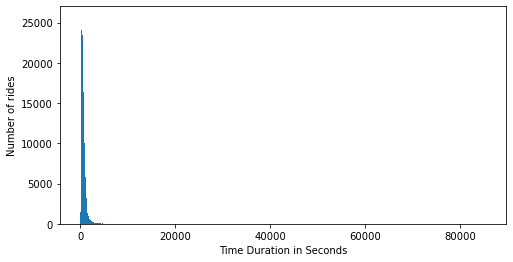

In [6]:
# Number of rides per Duration in second
fig, ax = plt.subplots(figsize = [8,4])
bins = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins);
plt.xlabel('Time Duration in Seconds')
plt.ylabel('Number of rides')
plt.show()

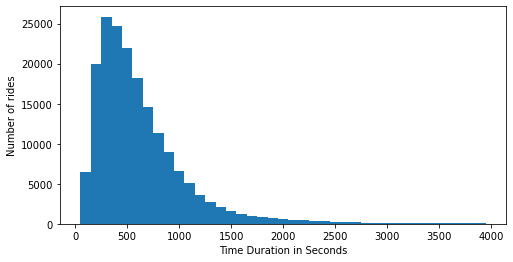

In [7]:
# We will decrease the range as there are extreme outliers
fig, ax = plt.subplots(figsize = [8,4])
bins = np.arange(50, 4000, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins);
plt.xlabel('Time Duration in Seconds')
plt.ylabel('Number of rides')
plt.show()

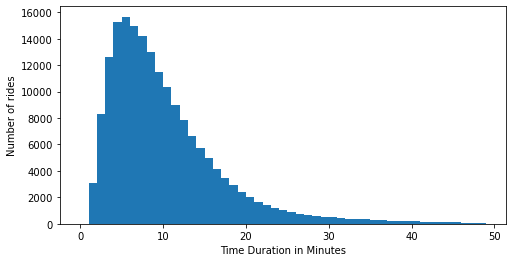

In [8]:
# We will add duration in minutes to discuss in a better way
fig, ax = plt.subplots(figsize = [8,4])
df_clean["duration_min"] = df_clean.duration_sec/60
bins = np.arange(0, 50, 1)
plt.hist(data = df_clean, x = 'duration_min', bins = bins)

plt.xlabel('Time Duration in Minutes')
plt.ylabel('Number of rides')

plt.show()

In [9]:
df_clean.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

####  Most of the rides took less than 15 min as 75% less than 13.3 min. 

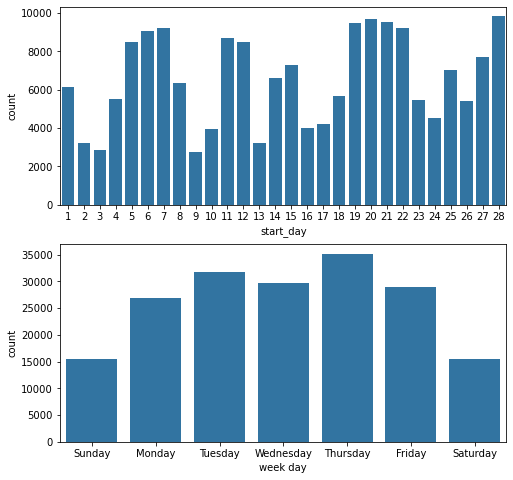

In [10]:
# Dicover the renting rate among days
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'start_day', color = sb.color_palette()[0], ax = ax[0])
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.countplot(data = df_clean, x = 'week day', color = default_color,order = order, ax = ax[1])
plt.show()

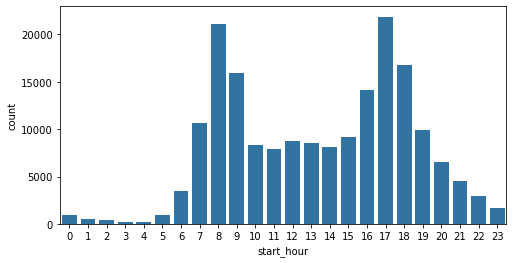

In [11]:
# Dicover the renting rate among hours
fig, ax = plt.subplots(figsize = [8,4])
sb.countplot(data = df_clean, x = 'start_hour', color = sb.color_palette()[0])

#### It appears that the day that had top renting rate was the last day of the month 28, while the top week day is Thursday and the lowest are the two weekends days (Saturday and Friday) and from that we can conclude that most of members using the service in going and coming from work specially that the high demanded hour is 8 am and 5 pm.

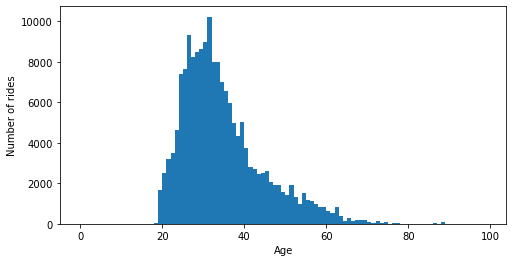

In [12]:
#explore the distribution of the age of the members
fig, ax = plt.subplots(figsize = [8,4])
bins = np.arange(0, 100, 1)
plt.hist(data = df_clean, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

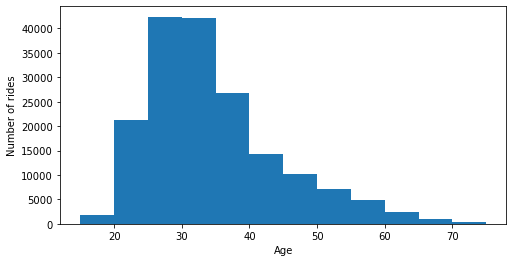

In [13]:
fig, ax = plt.subplots(figsize = [8,4])
bins = np.arange(15, 80, 5)
plt.hist(data = df_clean, x = 'age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

#### We found from the above graphs that most of our members are between 25 and 35 years

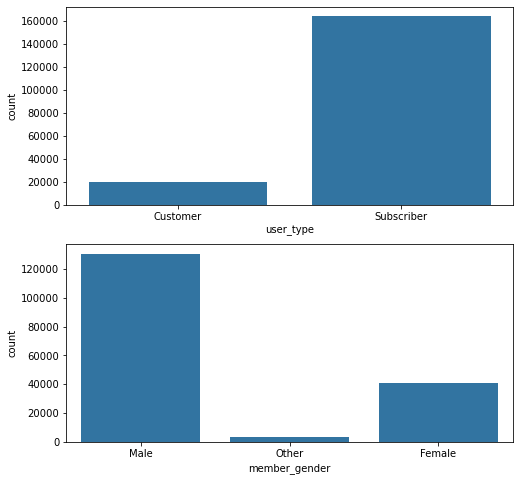

In [14]:
# We will plot two properties of the mebmbers we have,

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.countplot(data = df_clean, x = 'user_type', color = sb.color_palette()[0], ax = ax[0])
sb.countplot(data = df_clean, x = 'member_gender', color = sb.color_palette()[0], ax = ax[1])
plt.show()

#### We found from the above graphs that most of our members are males and their type is subscriber.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I made some transformation as to fill all mising birth years with 0 to convert them after that to integer, I also neglect the outliers taht appeared on the age and focus on the large segment I have

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the start time and end time to datetime type then spit the start time to months, days and hours and start working on them. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


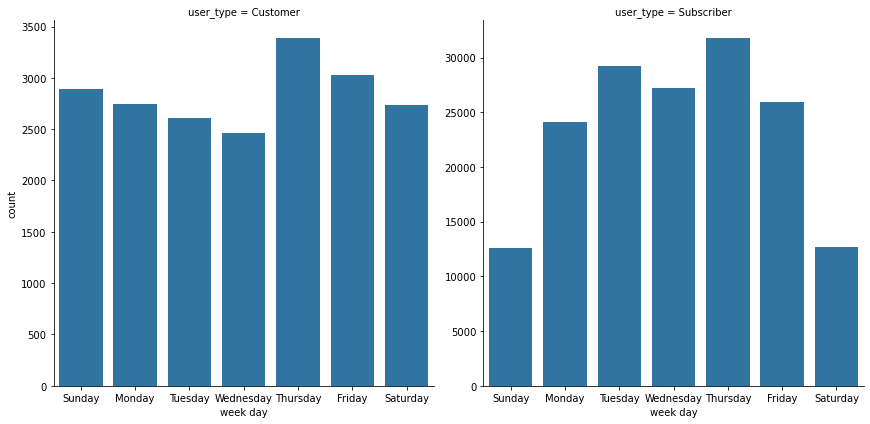

In [15]:
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.catplot(data=df_clean, x='week day', col="user_type", kind='count', color = sb.color_palette()[0]
           , sharey = False, order = order, size = 6);

#### We found that the top day is Thursday for the both types but the lowest day is differnet as in subscriber is still the week end days (Saturday and Sunday) while it is Wednesday in the customer type.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


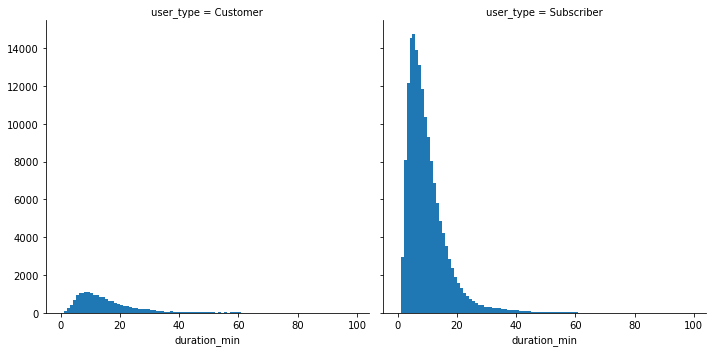

In [16]:
bins = np.arange(0, 100, 1)
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 5, margin_titles = True)
g.map(plt.hist, "duration_min", color = sb.color_palette()[0], bins = bins)

#### From the above figure we found that the distributions are skewed left and appear clearly on the subscriber type.

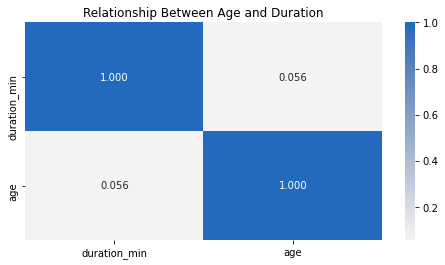

In [17]:
plt.figure(figsize = [8, 4])
sb.heatmap(df_clean[['duration_min', 'age']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

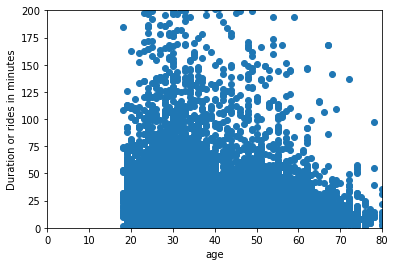

In [18]:
plt.scatter(data = df_clean, x = 'age', y = 'duration_min');
plt.xlabel('age')
plt.ylabel('Duration or rides in minutes')
plt.xlim(0, 80);
plt.ylim(0, 200);

#### It appaers (as obivous) from the above graphs that as the age increase the duarion decrease

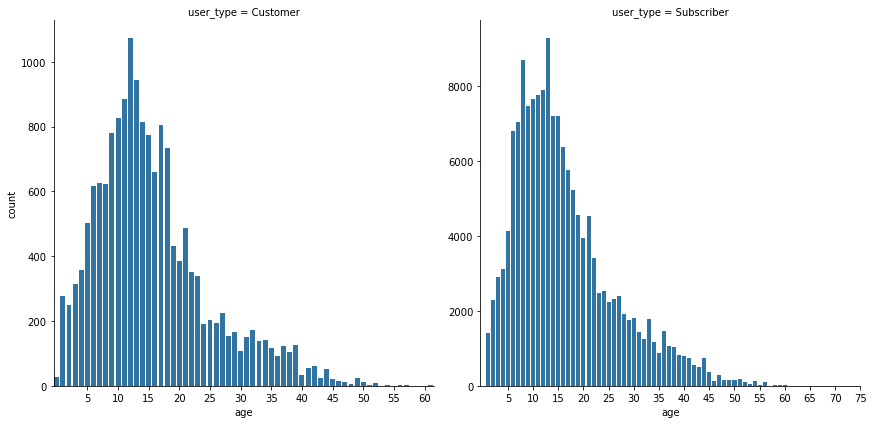

In [19]:
df_cleaned_age = df_clean.query('age <= 80')
df_cleaned_age.age
sb.catplot(data=df_cleaned_age, x='age', col="user_type", kind='count', color = sb.color_palette()[0]
           , sharey = False, size = 6);
plt.xticks( np.arange(5, 80, 5),np.arange(5, 80, 5));

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It appears that the Subscribers with low age is more like to use the renting service specially in the working days, while for customers the renting is more at the week end.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, it appears that the subcribers are using this service for going to work as they are more using this service in working days at before and after wroking hours

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

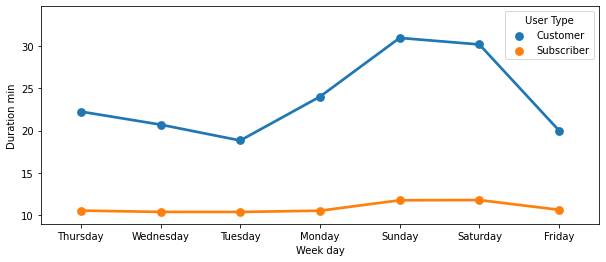

In [20]:

plt.figure(figsize=[10, 4])

# plot the point plot of month vs user type
sb.pointplot(data=df_clean, x='week day', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Week day')
plt.ylabel('Duration min')
plt.legend(title ='User Type')

#### It appears that users specially customers use the service in weekends day (Saturady and Sunday) as kind of sport as ithe ride take moe time in these days.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


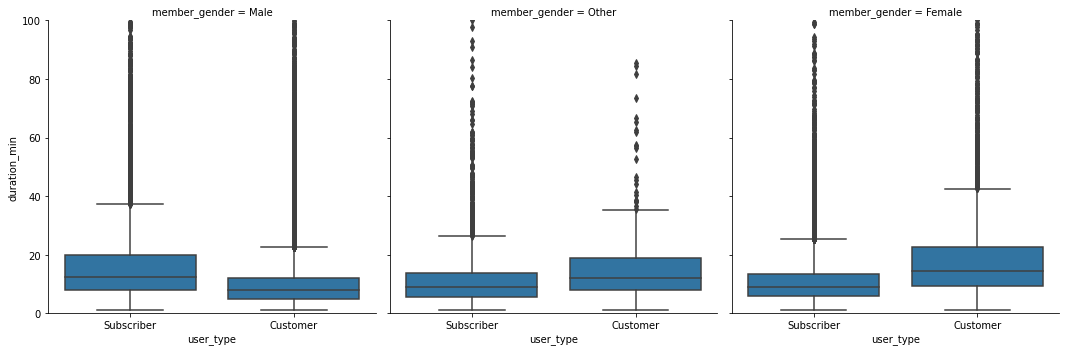

In [21]:
g = sb.FacetGrid(data = df_cleaned_age, col = 'member_gender', size = 5, margin_titles = True)
g.map(sb.boxplot, 'user_type', 'duration_min')
plt.ylim(0, 100);

#### From the above figure it apears that the male subscribers are tenting to go for more duration, but for females the customers are the one who brefer long ride

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After we investigate three variables with each other we found good information about the duartion and its relation with cutomer type and the week days, as the duation increase in the week ends (what seems logical if we consider that hiring is for sport purpose).

### Were there any interesting or surprising interactions between features?

> Yes, that the male subscribers ride for more time than that the customer member while females subscribers ride for less time than that the customer member

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!